In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import numpy
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


In [137]:
campagne_df = pd.read_csv(r"C:\Users\franc\PROJET GITHUB\Prediction_CampagneMarketing\Dataset_Reponse_Marketing.csv")
campagne_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   2400 non-null   int64  
 1   Sexe                  2400 non-null   object 
 2   Revenu_annuel         2400 non-null   int64  
 3   Temps_passe_sur_site  2400 non-null   float64
 4   Achats_en_ligne       2400 non-null   int64  
 5   Reponse_campagne      2400 non-null   int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 112.6+ KB


In [138]:
print(campagne_df.head(5))

   Age   Sexe  Revenu_annuel  Temps_passe_sur_site  Achats_en_ligne  \
0   22  Homme          40124             16.518974                9   
1   32  Femme          26307             21.973535                8   
2   28  Femme          30040             26.762915                9   
3   16  Femme          15843             29.046008                9   
4   45  Homme          20225             21.479944                5   

   Reponse_campagne  
0                 1  
1                 1  
2                 1  
3                 0  
4                 0  


In [139]:
print(campagne_df.shape)

(2400, 6)


In [140]:
print(campagne_df.isnull().sum())

Age                     0
Sexe                    0
Revenu_annuel           0
Temps_passe_sur_site    0
Achats_en_ligne         0
Reponse_campagne        0
dtype: int64


In [141]:
campagne_df['Reponse_campagne'].value_counts()


Reponse_campagne
1    1263
0    1137
Name: count, dtype: int64

In [142]:
campagne_df.describe()


,Age,Revenu_annuel,Temps_passe_sur_site,Achats_en_ligne,Reponse_campagne
count,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000
mean,34.611250,26197.005000,22.073762,7.642083,0.526250
std,10.087287,7062.015627,3.993837,1.612471,0.499415
min,-1.000000,4422.000000,8.656394,2.000000,0.000000
25%,28.000000,21414.250000,19.381206,7.000000,0.000000
50%,35.000000,26222.000000,22.072839,8.000000,1.000000
75%,42.000000,30909.250000,24.798229,9.000000,1.000000
max,79.000000,50002.000000,37.769324,13.000000,1.000000


Analyse variable age: 
Problème détecté : valeur minimale de -1, cela n'est pas cohérent (âge négatif).

Moyenne : 34.61 ans, médiane : 35 ans. La répartition est assez équilibrée autour de la trentaine.

Écart-type : ~10 ans, il y a une bonne diversité d'âges.

Interprétation : Il faudra traiter les valeurs aberrantes (-1) avant l’analyse car les personnes de moins de 15 ans n'ont vraiment pas d'incidence sur la campagne..

Analyse variable Revenu_annuel
Min : 4 422 € ; Max : 50 002 € La fourchette est large.

Moyenne : ~26 197 €, Médiane : ~26 222 €, la distribution est relativement symétrique.

Écart-type élevé : ~7 062 €,  forte dispersion des revenus autour de la moyenne.

À surveiller : potentiellement quelques cas extrêmes mais pas forcément aberrants.

Analyse variable Temps_passe_sur_site
Min : ~8,7 minutes ; Max : ~37,8 minutes → valeurs réalistes si la variable est cumulée ou hebdomadaire.

Moyenne : ~22 minutes, médiane très proche: 22, la distribution semble symétrique.


Analyse variable Achats_en_ligne
Min : 2, Max : 13  les nombres  d’achats sont raisonnable.

Moyenne : ~7.64, médiane : 8 → distribution légèrement asymétrique.

Remarque :  pas de valeurs aberrantes apparentes.

In [102]:
campagne_df['Sexe'].describe()


count      2400
unique        2
top       Femme
freq       1238
Name: Sexe, dtype: object

Les femmes sont plus nombreuses que les hommes.

Age


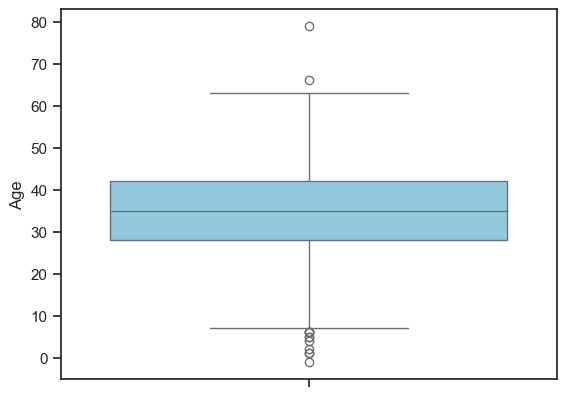

Revenu_annuel


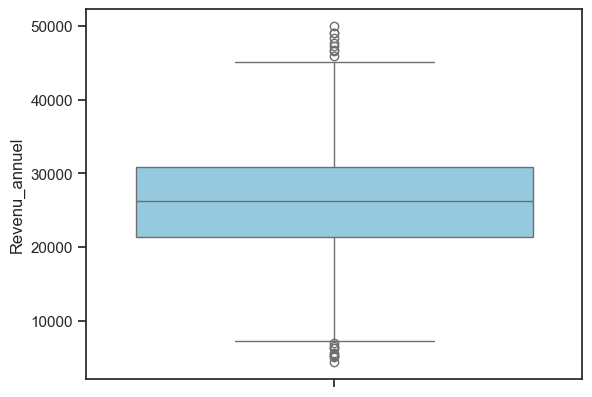

Temps_passe_sur_site


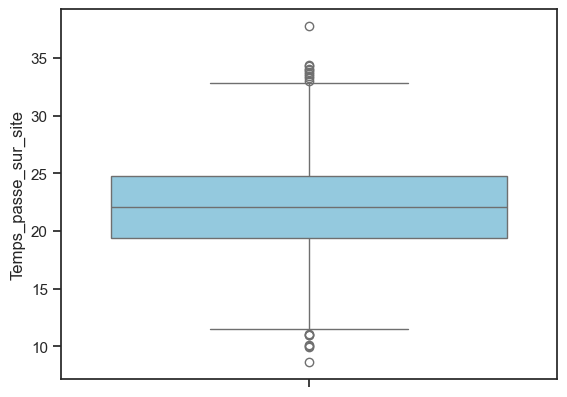

Achats_en_ligne


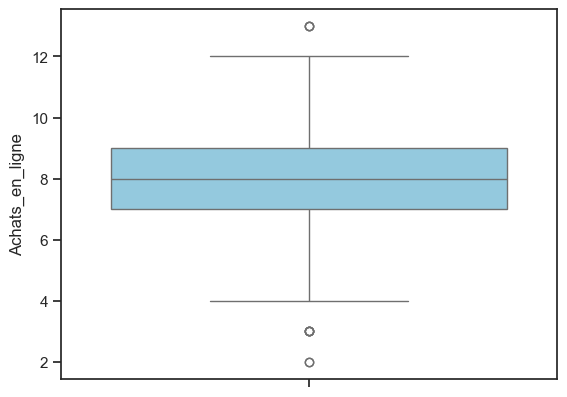

Reponse_campagne


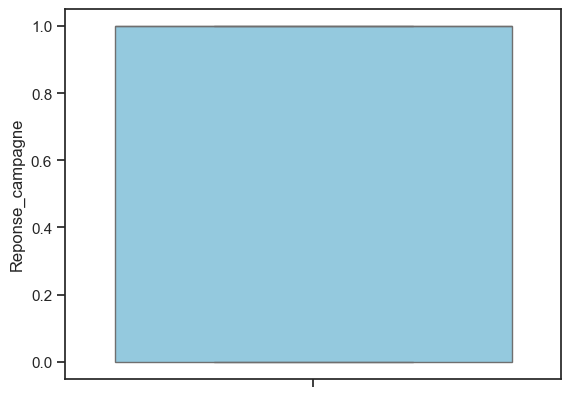

In [ ]:
# Analyses des variables quantitatives: 
quant_vars = campagne_df.select_dtypes(include=['float64', 'int64'])

# Tracé des boxplots pour chaque variable quantitative avec Seaborn
sns.set(style="ticks")
for var in quant_vars:
    print(var)
    sns.boxplot(y=var, data=quant_vars, color="skyblue")
    plt.show()

On constate sur ces tracé de box plot que les colonnes Age, Revenu_annule, Temps_passe_sur_site et Achats_en_ligne ont des valeurs abérantes. Cependant elles ne sont pas nombreuses et c'est la colonne qui devrait être corrigé car des personnes de moins de 0 ans font partie de notre échantillon, ce qui n'est pas réaliste.

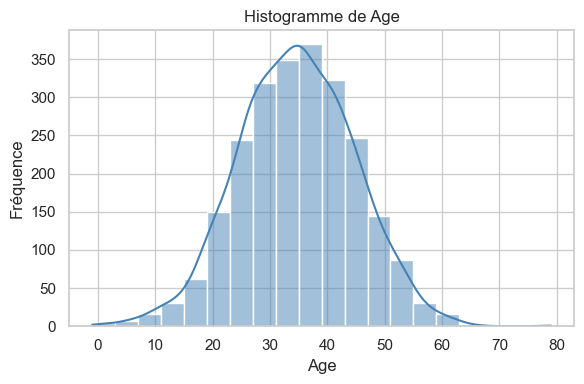

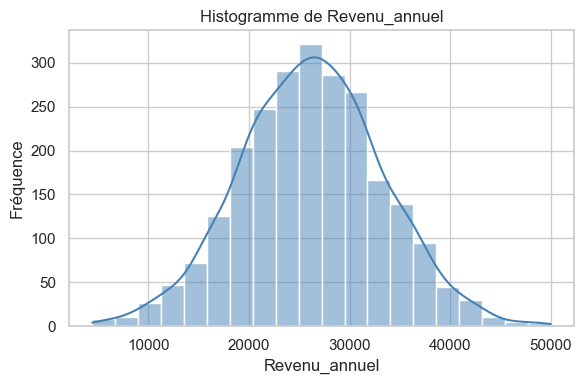

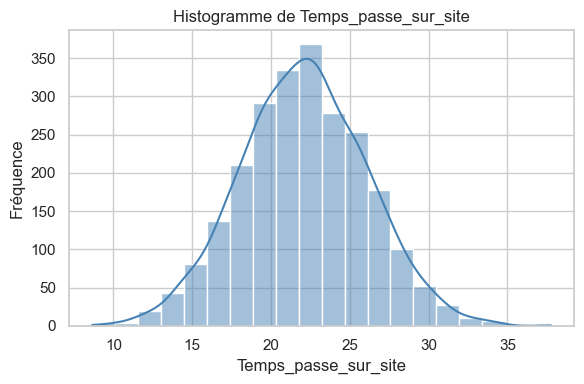

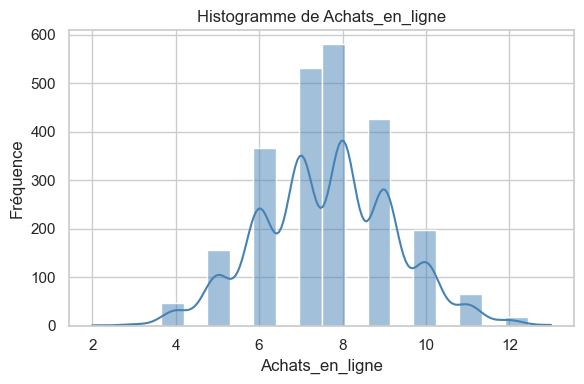

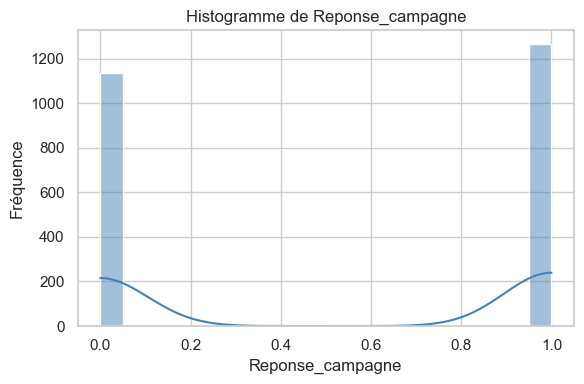

In [ ]:
#Visualisons ces colonnes sur des histogrammes: 

quant_vars = campagne_df.select_dtypes(include=['float64', 'int64'])

sns.set(style="whitegrid")

for var in quant_vars:
    plt.figure(figsize=(6, 4))
    sns.histplot(campagne_df[var], bins=20, kde=True, color="steelblue")
    plt.title(f'Histogramme de {var}')
    plt.xlabel(var)
    plt.ylabel('Fréquence')
    plt.tight_layout()
    plt.show()


In [105]:
for col in campagne_df.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = campagne_df[col].quantile(0.25)
    Q3 = campagne_df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = campagne_df[(campagne_df[col] < Q1 - 1.5 * IQR) | (campagne_df[col] > Q3 + 1.5 * IQR)]
    print(f"{col} : {len(outliers)} valeurs aberrantes")


Age : 13 valeurs aberrantes
Revenu_annuel : 18 valeurs aberrantes
Temps_passe_sur_site : 17 valeurs aberrantes
Achats_en_ligne : 10 valeurs aberrantes
Reponse_campagne : 0 valeurs aberrantes


Après calcul du nombre de valeurs abérrantes, nous allons uniquement supprimer ceux en lien avec l'age qui sont inférieurs à 16 ans?

In [106]:
# Garde uniquement les lignes où l'âge est supérieur ou égal à 16
campagne_df = campagne_df[campagne_df['Age'] >= 16]

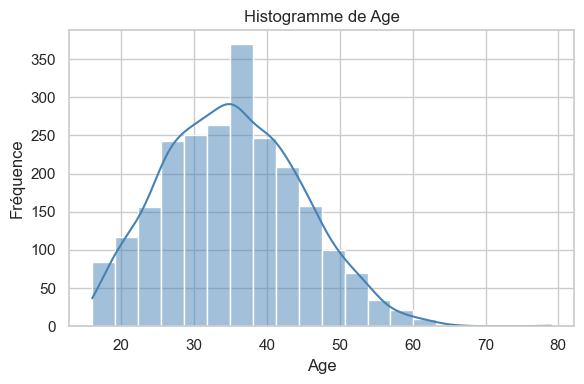

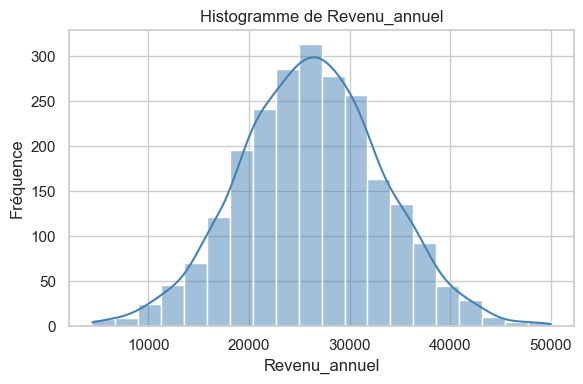

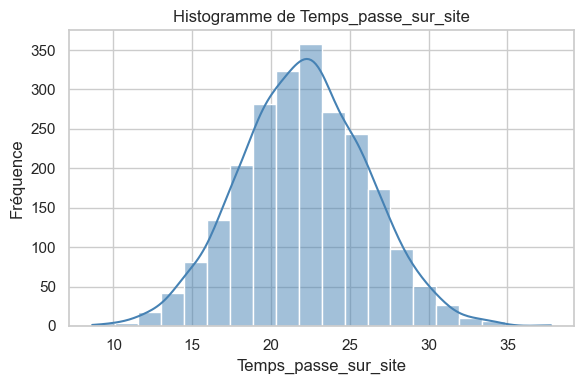

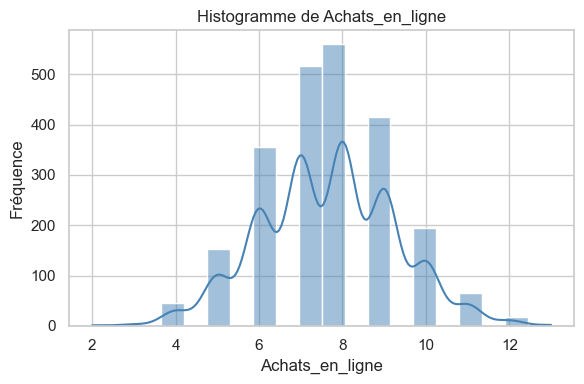

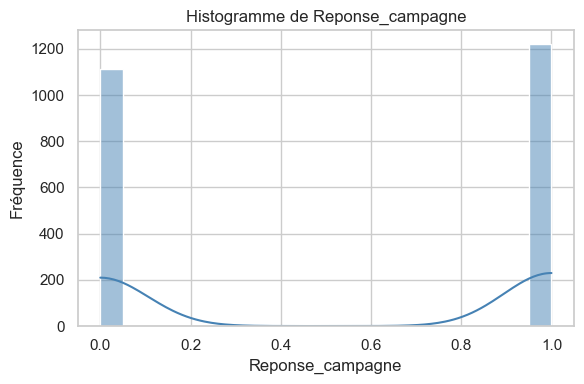

In [107]:
quant_vars = campagne_df.select_dtypes(include=['float64', 'int64'])

sns.set(style="whitegrid")

for var in quant_vars:
    plt.figure(figsize=(6, 4))
    sns.histplot(campagne_df[var], bins=20, kde=True, color="steelblue")
    plt.title(f'Histogramme de {var}')
    plt.xlabel(var)
    plt.ylabel('Fréquence')
    plt.tight_layout()
    plt.show()


In [145]:
campagne_df.loc[:, 'Sexe'] = campagne_df['Sexe'].map({'Femme': 1, 'Homme': 0})
#remplaçons les modalités de la colonne Sexe en attribuant la valeur 1 aux femmes et 0 aux hommes. Cela permettra de faciliter nos analyses 

In [109]:
print(campagne_df.isnull().sum())

Age                     0
Sexe                    0
Revenu_annuel           0
Temps_passe_sur_site    0
Achats_en_ligne         0
Reponse_campagne        0
dtype: int64


In [ ]:
#Resultats
print(campagne_df)

      Age Sexe  Revenu_annuel  Temps_passe_sur_site  Achats_en_ligne  \
0      22    0          40124             16.518974                9   
1      32    1          26307             21.973535                8   
2      28    1          30040             26.762915                9   
3      16    1          15843             29.046008                9   
4      45    0          20225             21.479944                5   
...   ...  ...            ...                   ...              ...   
2395   26    0          34373             31.567494               10   
2396   37    1          36249             26.347662               10   
2397   30    1          34293             18.275369                7   
2398   35    0          29447             17.211780                6   
2399   39    1          28028             32.826752               10   

      Reponse_campagne  
0                    1  
1                    1  
2                    1  
3                    0  
4         

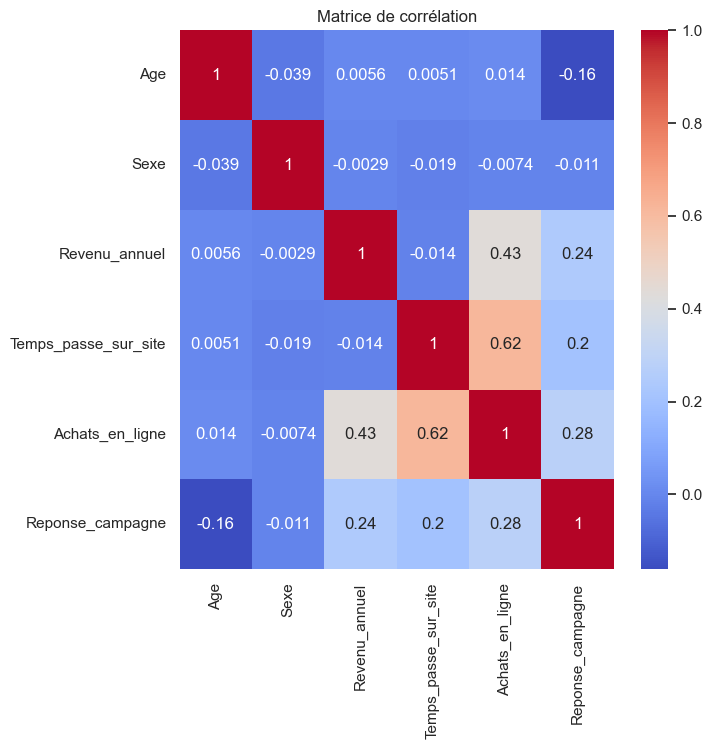

In [ ]:
#La Matrice de corrélation obtenue permettra de voir les liaisons entre les variables du problème.
corr_matrix = campagne_df.corr()

# Calcul des p-values pour chaque paire de variables
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(corr_matrix,annot=True,cmap="coolwarm")
plt.title("Matrice de corrélation")
plt.show()

Relations significatives:

La corrélation la plus forte (0.62) existe entre le temps passé sur le site et les achats en ligne, indiquant logiquement que plus un utilisateur passe de temps sur la plateforme, plus il est susceptible d'effectuer des achats

Une corrélation modérée (0.43) entre le revenu annuel et les achats en ligne suggère que les personnes à revenus plus élevés ont tendance à dépenser davantage

Les colonnes temps passé sur le site et Achats en ligne ont des corrélations positives avec la réponse aux campagnes qui est la solution de notre problème  (les valeurs sont de 0.20 à 0.28)

Relations faibles:

L'âge présente une corrélation négative faible (-0.16) avec la réponse aux campagnes, suggérant que les personnes plus jeunes pourraient être légèrement plus réceptives aux campagnes marketing

Les variables démographiques (âge et sexe) ont généralement des corrélations très faibles avec les comportements d'achat

En général, les variables de notre problèmes ne sont pas corrélées entre elle, ce qui cause problème pour des analyses comme la PCA.

Pour améliorer les corrélations entre ces variables, plusieurs approches sont possibles:

Transformation des variables : Appliquer des transformations mathématiques (logarithmique, racine carrée) pour révéler des relations non-linéaires potentielles

Création de variables composites : Combiner certaines variables pour créer de nouveaux indicateurs plus pertinents (par exemple, un score d'engagement combinant temps sur site et fréquence d'achat)

Segmentation de l'analyse : Étudier les corrélations au sein de sous-groupes spécifiques (par tranche d'âge par exemple) pourrait révéler des corrélations plus fortes dans certains segments

Collecte de données supplémentaires : Ajouter des variables qui pourraient avoir des liens plus forts avec les comportements actuels (historique d'achat, préférences déclarées, etc.)

Traitement des valeurs aberrantes : Identifier et gérer les outliers qui pourraient masquer certaines corrélations

In [112]:
Q1 = campagne_df['Temps_passe_sur_site'].quantile(0.25)
Q3 = campagne_df['Temps_passe_sur_site'].quantile(0.75)
IQR = Q3 - Q1

borne_inf = Q1 - 1.5 * IQR
borne_sup = Q3 + 1.5 * IQR

campagne_df = campagne_df[(campagne_df['Temps_passe_sur_site'] >= borne_inf) & (campagne_df['Temps_passe_sur_site'] <= borne_sup)]


In [113]:
Q1 = campagne_df['Achats_en_ligne'].quantile(0.25)
Q3 = campagne_df['Achats_en_ligne'].quantile(0.75)
IQR = Q3 - Q1

borne_inf = Q1 - 1.5 * IQR
borne_sup = Q3 + 1.5 * IQR
campagne_df = campagne_df[(campagne_df['Achats_en_ligne'] >= borne_inf) & (campagne_df['Achats_en_ligne'] <= borne_sup)]

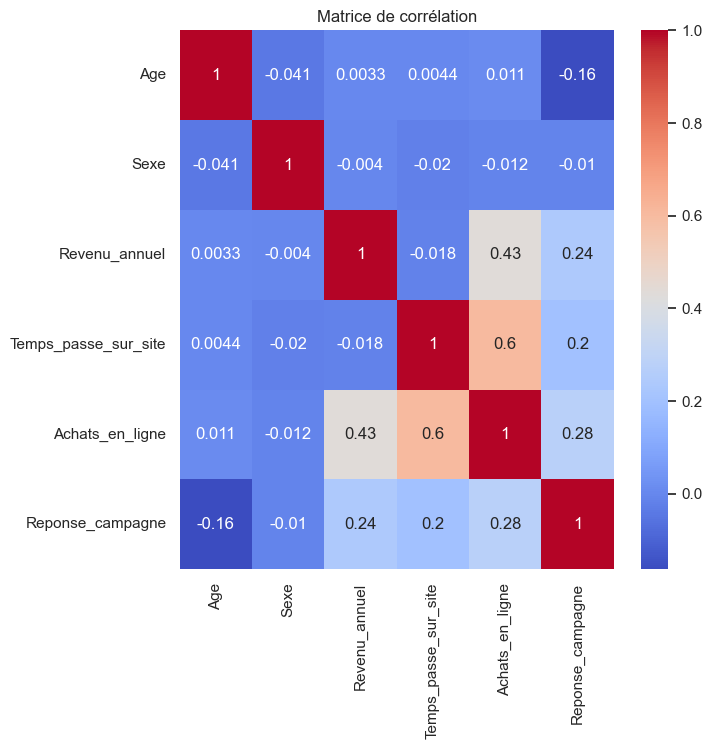

In [114]:

corr_matrix = campagne_df.corr()

# Calcul des p-values pour chaque paire de variables
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(corr_matrix,annot=True,cmap="coolwarm")
plt.title("Matrice de corrélation")
plt.show()

Pas de changement après supression des outliers des deux colonnes les plus correlées. Il faudrais recolter plus de variables discriminates pour avoir plus de liens entre les variables.

In [146]:
problem = campagne_df.drop("Reponse_campagne", axis=1)
solution = campagne_df[["Reponse_campagne"]]

In [147]:
standard_scaler_object = StandardScaler()
campagne_df_scaled = standard_scaler_object.fit_transform(problem)

In [148]:
pca_object = PCA(4)
principal_components = pca_object.fit_transform(campagne_df_scaled)

In [149]:
#Analyse de variance
explained_variance = pca_object.explained_variance_ratio_
cumulative_variance = numpy.cumsum(explained_variance)

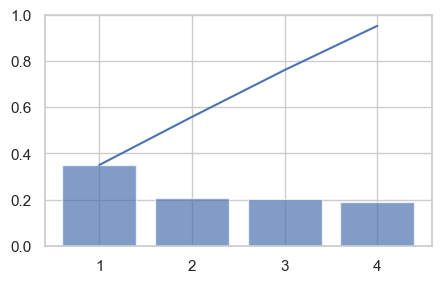

In [150]:
plt.figure(figsize=(5,3))
plt.bar(range(1,len(explained_variance) + 1),explained_variance,alpha=0.7,label='explained_variance')
plt.plot(range(1,len(cumulative_variance) + 1),cumulative_variance, label='cumulative_variance')
plt.show()

In [ ]:
compressed_data = principal_components[:, :4]


In [89]:
compressed_data

array([[ 0.59500673,  0.81613551,  2.12658488, -1.96637117],
       [ 0.11268972,  0.92542491, -0.14355349,  0.44280868],
       [ 1.48238043,  1.19708071, -0.52900916,  0.18241998],
       ...,
       [-0.43023372,  1.38487046,  1.23935168,  0.13313417],
       [-1.24961213, -0.49612354,  1.1507582 , -0.88115169],
       [ 2.73770802,  0.18091428, -1.36996085,  1.12918233]],
      shape=(2308, 4))

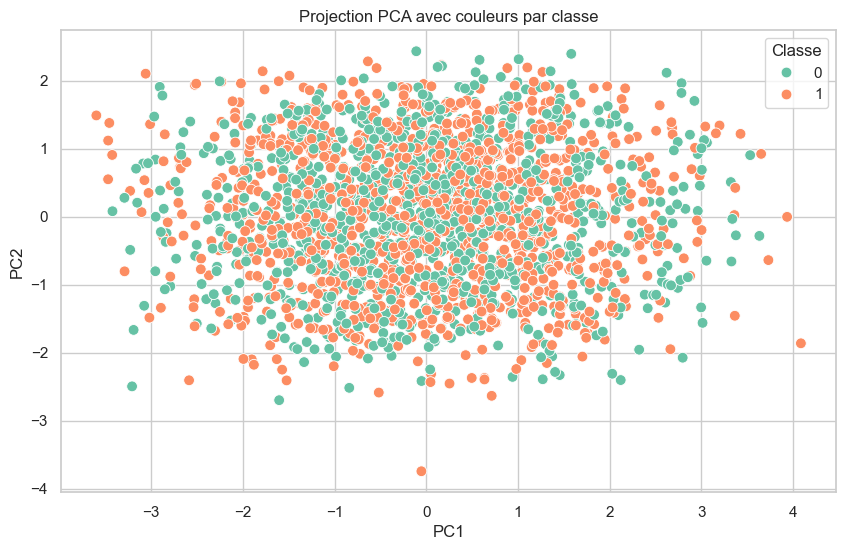

In [154]:
df_pca = pd.DataFrame(compressed_data[:, :2], columns=["PC1", "PC2"])
df_pca["Classe"] = solution

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue="Classe", palette="Set2", s=60)
plt.title("Projection PCA avec couleurs par classe")
plt.grid(True)
plt.show()

Le graphique présenté montre la projection de données sur les deux premières composantes principales (PC1 et PC2) issues d'une Analyse en Composantes Principales (PCA). Cette visualisation permet d'examiner la distribution des données dans un espace réduit à deux dimensions.

Le graphique montre deux classes distinctes: classe 0 (points verts) et classe 1 (points orange)

Les points des deux classes sont largement mélangés et distribués sur l'ensemble de l'espace PCA

Il n'y a pas de séparation claire entre les deux classes, ce qui suggère que les deux premières composantes principales ne permettent pas de différencier efficacement ces classe

La dispersion des données semble légèrement plus importante le long de PC1 que PC2, ce qui suggère que la première composante capture probablement plus de variance.

Interprétation: 
Cette PCA révèle plusieurs informations importantes sur notre jeu de données:
Absence de séparation linéaire: Les deux classes ne sont pas séparées par une simple projection sur les deux premières composantes principales, ce qui indique que les différences entre ces classes sont plus complexes
Nécessité d'analyses supplémentaires: Pour mieux discriminer ces classes, nous pouvons envisager:

L'exploration des composantes principales d'ordre supérieur (PC3, PC4, etc.)

L'utilisation de méthodes non-linéaires de réduction de dimension (t-SNE, UMAP)

L'application d'algorithmes de classification plus sophistiqués

Structure des données peu dense: La distribution relativement uniforme des points suggère que les variables originales qui contribuent le plus aux deux premières composantes principales ne contiennent pas d'information discriminante forte entre les classes

Remarque : Les deux premières dimensions garde moins de 62 pourcent d'information.

Cette analyse montre les limites d'une approche PCA simple pour ce jeu de données particulier dont les colonnes du problème ne sont pas correlés entre elles pour la majorité. Cela suggère qu'une exploration plus approfondie serait nécessaire pour révéler les structures permettant de distinguer efficacement les deux classes.

In [157]:
pd.DataFrame(pca_object.components_[:4], columns=problem.columns, index=[f"PC_{number}" for number in range(4)])

,Age,Sexe,Revenu_annuel,Temps_passe_sur_site,Achats_en_ligne
PC_0,0.030077,-0.027225,0.401410,0.577199,0.709976
PC_1,0.705667,-0.660993,0.189379,-0.169257,-0.024710
PC_2,-0.052204,0.306255,0.779840,-0.543246,0.014695
PC_3,0.705888,0.684456,-0.155336,0.095223,0.006752


Premiè composante principale:
Temps passé sur site (0.577199) et Achats en ligne (0.709976) sont les variables les plus importantes.

Revenu annuel (0.401410) a aussi une contribution notable.

Age et Sexe ont des poids très faibles.

Interprétation : Cette composante semble capturer un axe lié au comportement en ligne (temps passé et achats), potentiellement associé au revenu.

Deuxieme composante principale: 
Age (0.705667) a un poids très élevé, suivi de Sexe (-0.660993).

Les autres variables ont des poids faibles.

Interprétation : Cette composante oppose principalement l’âge et le sexe, elle semble donc représenter une dimension démographique.

Troisième composante principale:
Revenu annuel (0.779840) domine largement, avec une contribution négative de Temps passé sur site (-0.543246).

Les autres variables sont peu représentées.

Interprétation : Cette composante oppose le revenu annuel au temps passé sur le site, ce qui pourrait indiquer que les personnes à revenu élevé passent moins de temps sur le site.

Quatrième composante principale: 
Age (0.705888) et Sexe (0.684456) ont des poids très élevés.

Les autres variables sont négligeables.

Interprétation : Cette composante est aussi fortement démographique, mais cette fois Age et Sexe évoluent dans le même sens.

3. Synthèse et interprétation globale : 
Les deux premières composantes capturent respectivement le comportement en ligne/revenu et les caractéristiques démographiques.

La troisième composante principale met en avant une opposition entre le revenu et le temps passé sur le site.

La quatrième composante principale : renforce la contribution conjointe de l’âge et du sexe.

Ce que cela signifie :

Les comportements en ligne (temps passé, achats) et le revenu sont très liés dans la première composante.

Les aspects démographiques (âge, sexe) sont bien séparés dans la deuxième et la quatrième composante.

Les variables "Achats en ligne" et "Temps passé sur site" sont très corrélées dans la première composante.

"Revenu annuel" est une variable structurante dans la troisième composante.

4. Conseils pour l’utilisation
Pour la visualisation : Les deux premières composantes peuvent être utilisées pour projeter les données et observer les groupes selon le comportement et la démographie.

Pour l’interprétation métier : Les axes principaux sont liés au comportement d’achat et aux caractéristiques socio-démographiques.

En résumé :
Ce tableau permet de comprendre quelles variables structurent le plus chaque axe principal de variation des données. Ici, le comportement en ligne et la démographie sont les deux grands axes qui expliquent la majorité de la variance du jeu de données.


In [118]:
solution = solution.values.ravel()
# 1. Dictionnaire des modèles
models = {
    "Régression Logistique": LogisticRegression(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(),
    "Arbre de Décision": DecisionTreeClassifier(),
    "SVM": SVC()
}

# 2. Dictionnaire des métriques
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}

# 3. Initialisation du tableau des résultats
results = []

# 4. Validation croisée pour chaque modèle
for name, model in models.items():
    scores = cross_validate(model, campagne_df_scaled, solution, cv=5, scoring=scoring)
    results.append({
        'Modèle': name,
        'Accuracy': scores['test_accuracy'].mean(),
        'Precision': scores['test_precision'].mean(),
        'Recall': scores['test_recall'].mean(),
        'F1-score': scores['test_f1'].mean()
    })

# 5. Affichage sous forme de DataFrame
results_df = pd.DataFrame(results)
print(results_df)


                  Modèle  Accuracy  Precision    Recall  F1-score
0  Régression Logistique  0.649476   0.657092  0.690138  0.673175
1                    KNN  0.610909   0.622259  0.651181  0.636276
2          Random Forest  0.651217   0.662764  0.679377  0.670692
3      Arbre de Décision  0.600958   0.619526  0.612304  0.615774
4                    SVM  0.660739   0.660670  0.723274  0.690427


Le tableau compare cinq modèles de classification selon quatre métriques :
Accuracy (exactitude)
Precision (précision)
Recall (rappel)
F1-score

Les modèles évalués sont :
Régression Logistique
KNN (K-Nearest Neighbors)
Random Forest
Arbre de Décision
SVM (Support Vector Machine)
SVM obtient le meilleur score en rappel (0.723) et en F1-score (0.690), ainsi que la meilleure accuracy (0.661).
Random Forest et Régression Logistique ont des performances proches et équilibrées, légèrement inférieures à SVM.
KNN et surtout Arbre de Décision sont moins performants sur l’ensemble des métriques.

SVM est le modèle le plus performant ici, particulièrement pour le rappel (capacité à retrouver les Faux négatifs) et le F1-score (équilibre entre précision et rappel).
Random Forest et Régression Logistique sont de bons choix alternatifs, offrant un bon compromis entre précision et rappel.
KNN présente des scores moyens, ce qui peut indiquer que la structure des données ne se prête pas parfaitement à cette méthode basée sur la proximité.
Arbre de Décision simple est le moins performant, ce qui est fréquent car il a tendance à sur-apprendre et à moins bien généraliser que les méthodes d’ensemble comme Random Forest.

SVM est à privilégier pour ce problème, surtout si le rappel est une priorité (par exemple, pour minimiser les faux négatifs).

Si l’interprétabilité est importante, la Régression Logistique peut être un bon compromis avec des performances proches.

Random Forest est aussi pertinent, notamment si l’on souhaite bénéficier de la robustesse des modèles d’ensemble.

Les modèles plus simples (KNN, Arbre de Décision) sont moins adaptés dans ce cas précis.

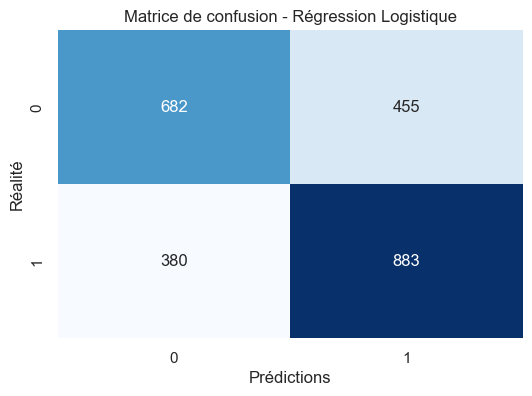

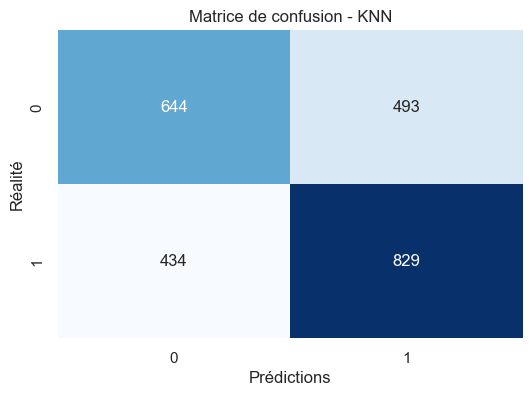

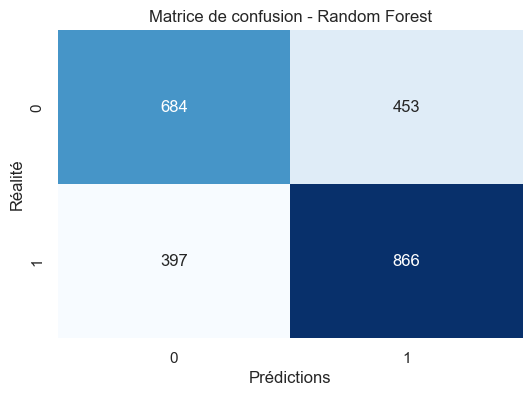

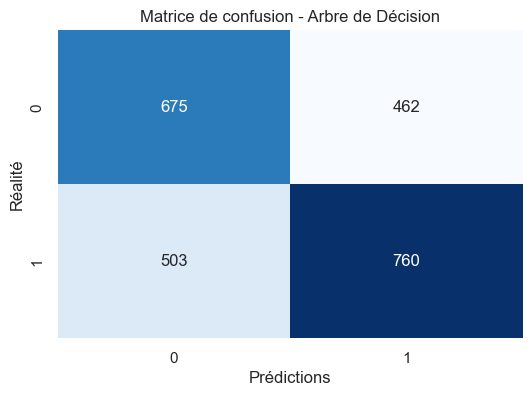

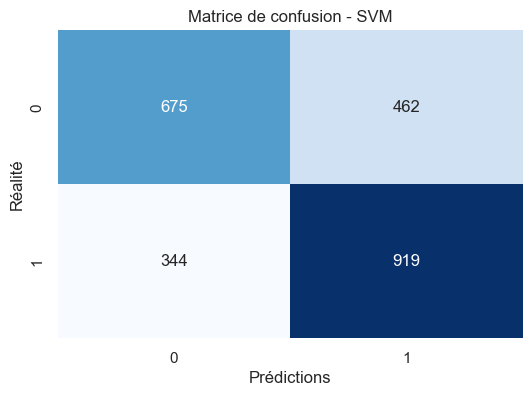

In [159]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

solution = solution.values.ravel()

for name, model in models.items():
    y_pred = cross_val_predict(model, campagne_df_scaled, solution, cv=5)
    cm = confusion_matrix(solution, y_pred)

    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"Matrice de confusion - {name}")
    plt.xlabel('Prédictions')
    plt.ylabel('Réalité')
    plt.show()


Dans le contexte de notre campagne marketing, où la colonne cible Reponse_campagne indique 1 si la personne a répondu à la campagne et 0 si elle n’a pas répondu, un faux négatif correspond à la situation suivante :

La réalité : la personne aurait répondu à la campagne (Reponse_campagne = 1).

La prédiction du modèle : le modèle prédit que cette personne ne répondra pas (prédit 0).

Autrement dit, le modèle "oublie" de cibler un individu qui aurait effectivement été réceptif à la campagne. Cela signifie que tu perds une opportunité de conversion, car une personne potentiellement intéressée n’est pas sollicitée par l’action marketing. 

Dans notre cas on devrait prendre un modèle dont le recall est plus petit afin de minimiser la situation précédente.

In [160]:
X_train, X_test, y_train, y_test = train_test_split(campagne_df_scaled, solution, random_state=42)

In [161]:


def get_optimal_k_value(campagne_df_scaled, solution):
    n_folds = 5
    parameters = {"n_neighbors" : numpy.arange(1, 52, 2)}
    grid_search_object = GridSearchCV(KNeighborsClassifier(),
                                    parameters,
                                     cv=n_folds,
                                     scoring="recall")
    
    grid_search_object.fit(campagne_df_scaled, solution)
    print(grid_search_object.best_params_)
    scores = pd.DataFrame(grid_search_object.cv_results_)
    return scores


In [162]:
scores = get_optimal_k_value(campagne_df_scaled, solution)
scores

{'n_neighbors': np.int64(27)}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001415,0.000397,0.011671,0.004381,1,{'n_neighbors': 1},0.616601,0.640316,0.628458,0.615079,0.579365,0.615964,0.020444,26
1,0.001408,0.000218,0.010042,0.001365,3,{'n_neighbors': 3},0.624506,0.640316,0.636364,0.658730,0.611111,0.634205,0.015943,25
2,0.001081,0.000017,0.009601,0.000695,5,{'n_neighbors': 5},0.664032,0.667984,0.652174,0.666667,0.630952,0.656362,0.013880,24
3,0.001182,0.000260,0.010695,0.001583,7,{'n_neighbors': 7},0.699605,0.664032,0.679842,0.694444,0.634921,0.674569,0.023378,23
4,0.001100,0.000044,0.012285,0.004251,9,{'n_neighbors': 9},0.683794,0.652174,0.695652,0.714286,0.662698,0.681721,0.022333,22
5,0.001212,0.000180,0.010600,0.000539,11,{'n_neighbors': 11},0.711462,0.687747,0.703557,0.726190,0.662698,0.698331,0.021715,15
6,0.001176,0.000174,0.009936,0.000502,13,{'n_neighbors': 13},0.703557,0.679842,0.719368,0.714286,0.662698,0.695950,0.021483,16
7,0.001103,0.000055,0.011569,0.000752,15,{'n_neighbors': 15},0.711462,0.683794,0.703557,0.714286,0.650794,0.692779,0.023543,17
8,0.001231,0.000196,0.011664,0.000960,17,{'n_neighbors': 17},0.699605,0.695652,0.687747,0.702381,0.634921,0.684061,0.025060,20
9,0.001316,0.000205,0.012166,0.001057,19,{'n_neighbors': 19},0.695652,0.679842,0.679842,0.714286,0.642857,0.682496,0.023533,21


Ce tableau est le résultat d’une recherche d’hyperparamètres avec GridSearchCV pour un modèle KNN (KNeighborsClassifier), évalué avec validation croisée (cross-validation).
Chaque ligne du tableau représente les résultats pour une valeur spécifique de l’hyperparamètre n_neighbors.

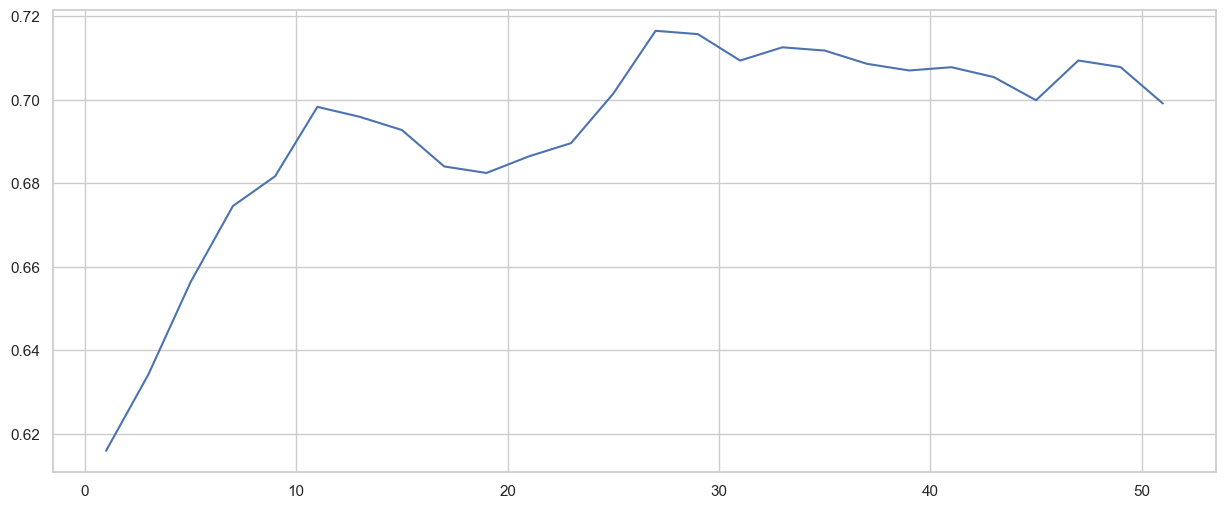

In [163]:
plt.figure(figsize=(15,6))
plt.plot(scores["param_n_neighbors"], scores["mean_test_score"])
plt.show()

In [164]:
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=17)

In [165]:
distances, indices = knn.kneighbors([X_test[257]])
print(distances[0])
print(indices[0])
for indice in indices[0]:
    print(y_train[indice])



[0.13169145 0.65930944 0.72830582 0.79193661 0.82486438 0.88907292
 0.94659052 0.96517605 0.97151848 0.9846458  0.99126902 1.06759102
 1.0886041  1.1218606  1.14971331 1.16627879 1.1937041 ]
[ 473 1098 1245 1573 1558  475  173 1220  761  608 1644 1472 1765 1670
  419  234  773]
0
1
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0


In [135]:
y_test[257]

np.int64(0)